<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on lab: Exploratory Data Analysis - Laptops Pricing dataset**



# Objectives

After completing this lab you will be able to:

 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [245]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
# df = pd.read_csv(filepath, header=None)
# df = pd.read_csv(filepath, index_col=0)
df = pd.read_csv(filepath)
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
# df = pd.read_csv('clean_df_of_Laptop_Pricing.csv')

Print the first 5 entries of the dataset to confirm loading.


In [246]:
df.head(5)

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      238 non-null    object 
 1   Category          238 non-null    int64  
 2   GPU               238 non-null    int64  
 3   OS                238 non-null    int64  
 4   CPU_core          238 non-null    int64  
 5   Screen_Size_inch  238 non-null    float64
 6   CPU_frequency     238 non-null    float64
 7   RAM_GB            238 non-null    int64  
 8   Storage_GB_SSD    238 non-null    int64  
 9   Weight_pounds     238 non-null    float64
 10  Price             238 non-null    int64  
 11  Price-binned      238 non-null    object 
 12  Screen-Full_HD    238 non-null    int64  
 13  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 26.2+ KB


In [261]:
df.describe()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [248]:
df.shape

(238, 14)

In [249]:
df.isnull().sum()

Manufacturer        0
Category            0
GPU                 0
OS                  0
CPU_core            0
Screen_Size_inch    0
CPU_frequency       0
RAM_GB              0
Storage_GB_SSD      0
Weight_pounds       0
Price               0
Price-binned        0
Screen-Full_HD      0
Screen-IPS_panel    0
dtype: int64

In [250]:
print(df.dtypes)

Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Price-binned         object
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object


# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


<Axes: xlabel='CPU_frequency', ylabel='Price'>

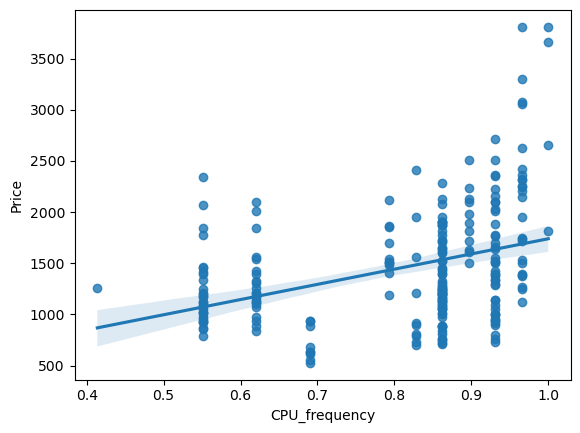

In [251]:
# Write your code below and press Shift+Enter to execute
# CPU_frequency plot
sns.regplot(x='CPU_frequency', y='Price', data=df)


<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

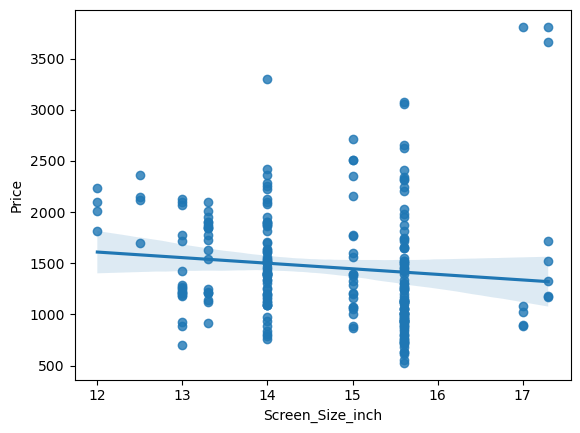

In [253]:
# Write your code below and press Shift+Enter to execute
# Screen_Size_inch plot
sns.regplot(x='Screen_Size_inch', y='Price', data=df)

<Axes: xlabel='Weight_pounds', ylabel='Price'>

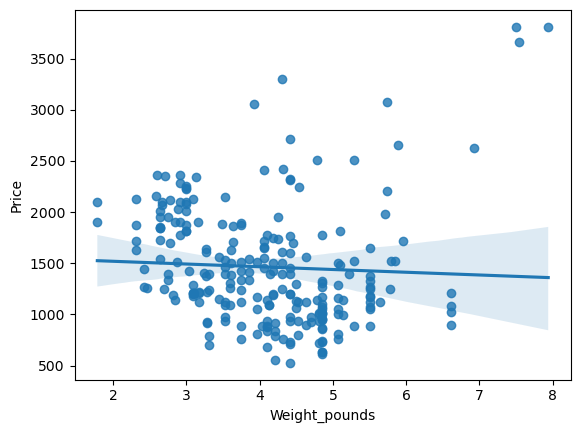

In [258]:
# Write your code below and press Shift+Enter to execute
# Weight_pounds plot
sns.regplot(x='Weight_pounds', y='Price', data=df)

In [260]:
# Correlation values of the three attributes with Price
cpu_corr = df['CPU_frequency'].corr(df['Price'])
print("Correlation between CPU_frequency and Price:", cpu_corr)
cpu_corr = df['Screen_Size_inch'].corr(df['Price'])
print("Correlation between Screen_Size_inch and Price:", cpu_corr)
cpu_corr = df['Weight_pounds'].corr(df['Price'])
print("Correlation between Weight_pounds and Price:", cpu_corr)

Correlation between CPU_frequency and Price: 0.3666655589258857
Correlation between Screen_Size_inch and Price: -0.11064420817118281
Correlation between Weight_pounds and Price: -0.05031225837751543


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


<Axes: ylabel='Category'>

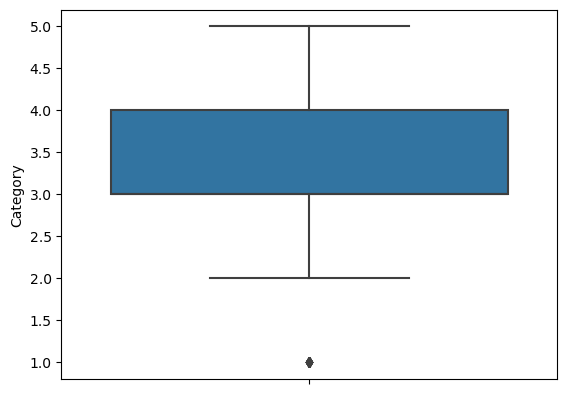

In [262]:
# Write your code below and press Shift+Enter to execute
# Category Box plot

sns.boxplot( y="Category", data=df)


<Axes: ylabel='GPU'>

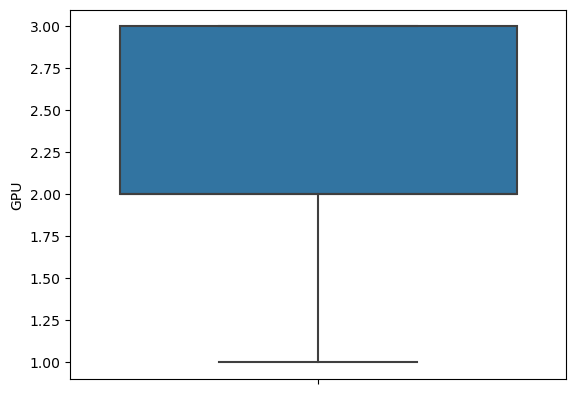

In [263]:
# Write your code below and press Shift+Enter to execute
# GPU Box plot
sns.boxplot( y="GPU", data=df)

<Axes: ylabel='OS'>

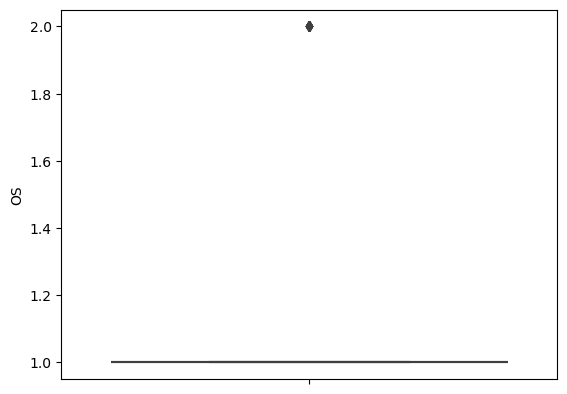

In [265]:
# Write your code below and press Shift+Enter to execute
# OS Box plot

sns.boxplot( y="OS", data=df)

<Axes: ylabel='CPU_core'>

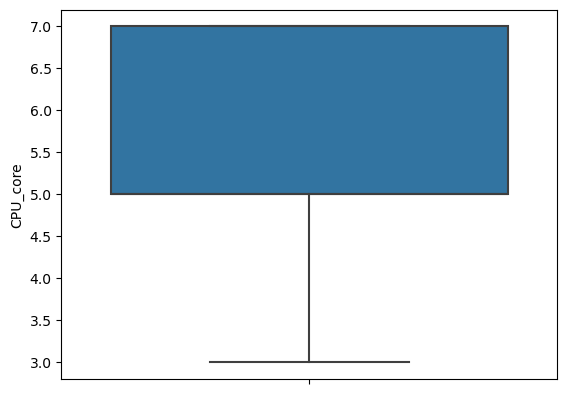

In [266]:
# Write your code below and press Shift+Enter to execute
# CPU_core Box plot

sns.boxplot( y="CPU_core", data=df)

<Axes: ylabel='RAM_GB'>

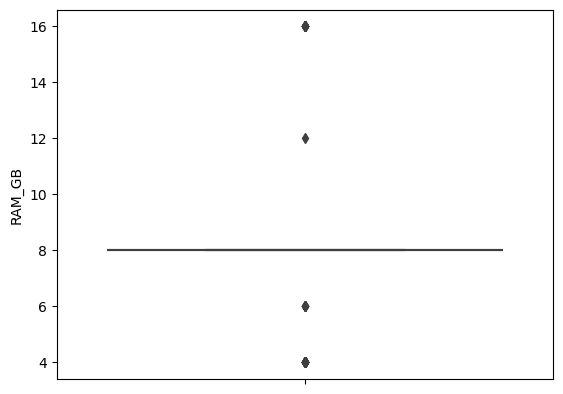

In [267]:
# Write your code below and press Shift+Enter to execute
# RAM_GB Box plot

sns.boxplot( y="RAM_GB", data=df)

<Axes: ylabel='Storage_GB_SSD'>

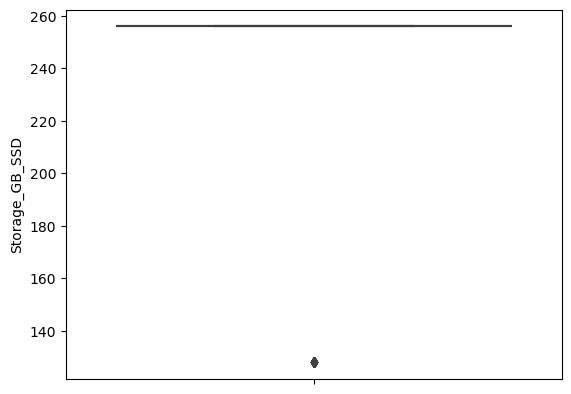

In [268]:
# Write your code below and press Shift+Enter to execute
# Storage_GB_SSD Box plot

sns.boxplot( y="Storage_GB_SSD", data=df)

# Task 2 - Descriptive Statistical Analysis


Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [269]:
df.describe()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [270]:
df.describe(include=['object'])


,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


In [271]:
df.describe(include='all')

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
count,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238.000000,238.000000
unique,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN
mean,NaN,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,NaN,0.676471,0.323529
std,NaN,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,NaN,0.468809,0.468809
min,NaN,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,NaN,0.000000,0.000000
25%,NaN,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,NaN,0.000000,0.000000
50%,NaN,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,NaN,1.000000,0.000000
75%,NaN,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,NaN,1.000000,1.000000


In [272]:
df['Manufacturer'].value_counts().to_frame()

,count
Manufacturer,
Dell,71
Lenovo,52
HP,49
Acer,19
Asus,18
Toshiba,17
Samsung,5
MSI,4
Huawei,1


In [273]:
# Write your code below and press Shift+Enter to execute
df['Price-binned'].value_counts().to_frame()

,count
Price-binned,
Low,160
Medium,72
High,6


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [282]:
print(df['GPU'].unique())
print(df['CPU_core'].unique())
# print(df['Price'].unique())


[2 1 3]
[5 3 7]


In [281]:
# Write your code below and press Shift+Enter to execute
# Create the group
df_group_one = df[['GPU', 'CPU_core', 'Price']]

df_group_one


,GPU,CPU_core,Price
0,2,5,978
1,1,3,634
2,1,7,946
3,2,5,1244
4,2,7,837
...,...,...,...
233,2,7,1891
234,2,5,1950
235,2,5,2236
236,3,5,883


In [301]:
# Write your code below and press Shift+Enter to execute
# Create the Pivot table
pivot_table = df.pivot_table(index='GPU', columns='CPU_core', values='Price')
pivot_table

CPU_core,3,5,7
GPU,,,
1,769.250000,998.500000,1167.941176
2,785.076923,1462.197674,1744.621622
3,784.000000,1220.680000,1945.097561


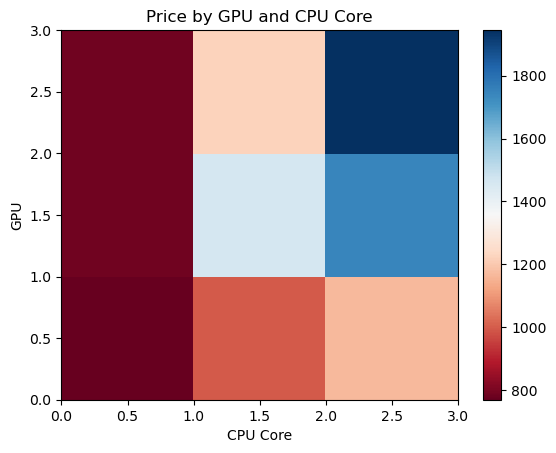

In [305]:
# Write your code below and press Shift+Enter to execute
# Create the Plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.title('Price by GPU and CPU Core')
plt.show()

# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [306]:
# Write your code below and press Shift+Enter to execute
df.corr(numeric_only=True)

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
Category,1.000000,-0.114174,-0.043378,0.232425,-0.285392,-0.053414,0.030127,0.038246,-0.381032,0.286243,-0.117608,0.117608
GPU,-0.114174,1.000000,-0.199549,0.145388,0.154251,0.291439,0.218973,0.094288,0.262853,0.288298,-0.089582,0.089582
OS,-0.043378,-0.199549,1.000000,0.016954,0.146695,0.050407,-0.074625,0.007751,0.120858,-0.221730,0.172891,-0.172891
CPU_core,0.232425,0.145388,0.016954,1.000000,0.041092,0.242722,0.473075,0.400015,0.068599,0.459398,0.003837,-0.003837
Screen_Size_inch,-0.285392,0.154251,0.146695,0.041092,1.000000,-0.000948,0.018194,0.119699,0.797534,-0.110644,0.342912,-0.342912
CPU_frequency,-0.053414,0.291439,0.050407,0.242722,-0.000948,1.000000,0.226736,0.035557,0.066522,0.366666,0.055273,-0.055273
RAM_GB,0.030127,0.218973,-0.074625,0.473075,0.018194,0.226736,1.000000,0.361469,0.055068,0.549297,0.017913,-0.017913
Storage_GB_SSD,0.038246,0.094288,0.007751,0.400015,0.119699,0.035557,0.361469,1.000000,0.112519,0.243421,0.061402,-0.061402
Weight_pounds,-0.381032,0.262853,0.120858,0.068599,0.797534,0.066522,0.055068,0.112519,1.000000,-0.050312,0.117909,-0.117909
Price,0.286243,0.288298,-0.221730,0.459398,-0.110644,0.366666,0.549297,0.243421,-0.050312,1.000000,-0.021075,0.021075


In [308]:
df.corr(numeric_only=True)['Price']

Category            0.286243
GPU                 0.288298
OS                 -0.221730
CPU_core            0.459398
Screen_Size_inch   -0.110644
CPU_frequency       0.366666
RAM_GB              0.549297
Storage_GB_SSD      0.243421
Weight_pounds      -0.050312
Price               1.000000
Screen-Full_HD     -0.021075
Screen-IPS_panel    0.021075
Name: Price, dtype: float64

In [309]:
df.corr(numeric_only=True)[['Price']].style.background_gradient(cmap='RdGy')

,Price
Category,0.286243
GPU,0.288298
OS,-0.221730
CPU_core,0.459398
Screen_Size_inch,-0.110644
CPU_frequency,0.366666
RAM_GB,0.549297
Storage_GB_SSD,0.243421
Weight_pounds,-0.050312
Price,1.000000


In [310]:
df.corr(numeric_only=True)['Price'].apply(abs).sort_values(ascending=False)

Price               1.000000
RAM_GB              0.549297
CPU_core            0.459398
CPU_frequency       0.366666
GPU                 0.288298
Category            0.286243
Storage_GB_SSD      0.243421
OS                  0.221730
Screen_Size_inch    0.110644
Weight_pounds       0.050312
Screen-Full_HD      0.021075
Screen-IPS_panel    0.021075
Name: Price, dtype: float64

In [311]:
from scipy import stats

In [312]:
pearson_coef, p_value = stats.pearsonr(df['RAM_GB'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5492972971857841  with a P-value of P = 3.6815606288429613e-20


In [314]:
pearson_coef, p_value = stats.pearsonr(df['CPU_core'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.45939777733551157  with a P-value of P = 7.912950127009034e-14


In [315]:
pearson_coef, p_value = stats.pearsonr(df['CPU_frequency'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.36666555892588604  with a P-value of P = 5.5024633507134225e-09


<Axes: xlabel='RAM_GB', ylabel='Price'>

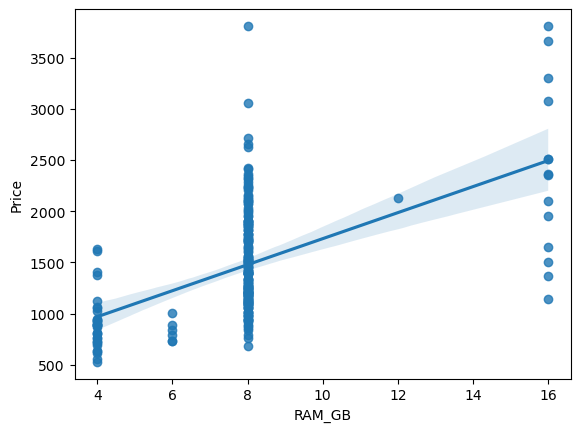

In [319]:
sns.regplot(x='RAM_GB', y='Price', data=df)
